# U.S. Pollution Data

### By: Aesha Aljohani

### Import libraries

In [1]:
#1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#2
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
# Pipeline
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
# Preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
# Models
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
# Evaluation
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
plt.style.use("ggplot")
#3
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
#4
import warnings
warnings.filterwarnings('ignore')

### Load Data

In [2]:
#Load Data 
df = pd.read_csv("pollution_us_2000_2016.csv")

In [3]:
df.head()

,Unnamed: 0,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,...,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,0,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,1.145833,4.2,21,NaN
1,1,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,0.878947,2.2,23,25.0
2,2,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,1.145833,4.2,21,NaN
3,3,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,0.878947,2.2,23,25.0
4,4,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,Parts per billion,...,Parts per billion,1.958333,3.0,22,4.0,Parts per million,0.850000,1.6,23,NaN


In [4]:
df.tail()

,Unnamed: 0,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,...,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
1746656,24599,56,21,100,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Not in a city,2016-03-30,Parts per billion,...,Parts per billion,0.000000,0.0,2,NaN,Parts per million,0.091667,0.100,2,1.0
1746657,24600,56,21,100,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Not in a city,2016-03-31,Parts per billion,...,Parts per billion,-0.022727,0.0,0,0.0,Parts per million,0.067714,0.127,0,NaN
1746658,24601,56,21,100,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Not in a city,2016-03-31,Parts per billion,...,Parts per billion,-0.022727,0.0,0,0.0,Parts per million,0.100000,0.100,0,1.0
1746659,24602,56,21,100,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Not in a city,2016-03-31,Parts per billion,...,Parts per billion,0.000000,0.0,5,NaN,Parts per million,0.067714,0.127,0,NaN
1746660,24603,56,21,100,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Not in a city,2016-03-31,Parts per billion,...,Parts per billion,0.000000,0.0,5,NaN,Parts per million,0.100000,0.100,0,1.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1746661 entries, 0 to 1746660
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   State Code         int64  
 2   County Code        int64  
 3   Site Num           int64  
 4   Address            object 
 5   State              object 
 6   County             object 
 7   City               object 
 8   Date Local         object 
 9   NO2 Units          object 
 10  NO2 Mean           float64
 11  NO2 1st Max Value  float64
 12  NO2 1st Max Hour   int64  
 13  NO2 AQI            int64  
 14  O3 Units           object 
 15  O3 Mean            float64
 16  O3 1st Max Value   float64
 17  O3 1st Max Hour    int64  
 18  O3 AQI             int64  
 19  SO2 Units          object 
 20  SO2 Mean           float64
 21  SO2 1st Max Value  float64
 22  SO2 1st Max Hour   int64  
 23  SO2 AQI            float64
 24  CO Units           object 
 25  CO Mean           

In [6]:
#print concise summery of the dataset
df.describe()

,Unnamed: 0,State Code,County Code,Site Num,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
count,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,873754.000000,1.746661e+06,1.746661e+06,1.746661e+06,873338.000000
mean,5.471414e+04,2.230907e+01,7.169381e+01,1.118214e+03,1.282193e+01,2.541485e+01,1.173102e+01,2.389822e+01,2.612485e-02,3.920331e-02,1.017053e+01,3.605012e+01,1.870364e+00,4.492185e+00,9.664906e+00,7.115945,3.682177e-01,6.201067e-01,7.875026e+00,5.996595
std,3.372908e+04,1.725621e+01,7.948023e+01,2.003103e+03,9.504814e+00,1.599963e+01,7.877501e+00,1.516280e+01,1.136974e-02,1.534362e-02,4.003144e+00,1.978042e+01,2.760435e+00,7.679866e+00,6.731228e+00,11.937473,3.140231e-01,6.439361e-01,7.978844e+00,5.851836
min,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-2.000000e+00,-2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.000000e+00,-2.000000e+00,0.000000e+00,0.000000,-4.375000e-01,-4.000000e-01,0.000000e+00,0.000000
25%,2.575300e+04,6.000000e+00,1.700000e+01,9.000000e+00,5.750000e+00,1.300000e+01,5.000000e+00,1.200000e+01,1.787500e-02,2.900000e-02,9.000000e+00,2.500000e+01,2.565220e-01,8.000000e-01,5.000000e+00,1.000000,1.834580e-01,2.920000e-01,0.000000e+00,2.000000
50%,5.304500e+04,1.700000e+01,5.900000e+01,6.000000e+01,1.073913e+01,2.400000e+01,9.000000e+00,2.300000e+01,2.587500e-02,3.800000e-02,1.000000e+01,3.300000e+01,9.875000e-01,2.000000e+00,8.000000e+00,3.000000,2.926250e-01,4.000000e-01,6.000000e+00,5.000000
75%,8.033600e+04,4.000000e+01,9.700000e+01,1.039000e+03,1.771364e+01,3.570000e+01,2.000000e+01,3.300000e+01,3.391700e-02,4.800000e-02,1.100000e+01,4.200000e+01,2.325000e+00,5.000000e+00,1.400000e+01,9.000000,4.666670e-01,8.000000e-01,1.300000e+01,8.000000
max,1.345750e+05,8.000000e+01,6.500000e+02,9.997000e+03,1.395417e+02,2.670000e+02,2.300000e+01,1.320000e+02,9.508300e-02,1.410000e-01,2.300000e+01,2.180000e+02,3.216250e+02,3.510000e+02,2.300000e+01,200.000000,7.508333e+00,1.990000e+01,2.300000e+01,201.000000


In [7]:
df.isna().sum()

Unnamed: 0                0
State Code                0
County Code               0
Site Num                  0
Address                   0
State                     0
County                    0
City                      0
Date Local                0
NO2 Units                 0
NO2 Mean                  0
NO2 1st Max Value         0
NO2 1st Max Hour          0
NO2 AQI                   0
O3 Units                  0
O3 Mean                   0
O3 1st Max Value          0
O3 1st Max Hour           0
O3 AQI                    0
SO2 Units                 0
SO2 Mean                  0
SO2 1st Max Value         0
SO2 1st Max Hour          0
SO2 AQI              872907
CO Units                  0
CO Mean                   0
CO 1st Max Value          0
CO 1st Max Hour           0
CO AQI               873323
dtype: int64

In [8]:
#df.fillna("Unknown", inplace = True)

**notes:** I replace all null values with Zero

In [9]:
# Filling null values with 0
df = df.replace(np.nan, 0)

In [10]:
df.isna().sum()

Unnamed: 0           0
State Code           0
County Code          0
Site Num             0
Address              0
State                0
County               0
City                 0
Date Local           0
NO2 Units            0
NO2 Mean             0
NO2 1st Max Value    0
NO2 1st Max Hour     0
NO2 AQI              0
O3 Units             0
O3 Mean              0
O3 1st Max Value     0
O3 1st Max Hour      0
O3 AQI               0
SO2 Units            0
SO2 Mean             0
SO2 1st Max Value    0
SO2 1st Max Hour     0
SO2 AQI              0
CO Units             0
CO Mean              0
CO 1st Max Value     0
CO 1st Max Hour      0
CO AQI               0
dtype: int64

In [11]:
sum(df.duplicated())

0

In [12]:
# This gives the statistics about "categorical columns"
df.describe(exclude='number')

,Address,State,County,City,Date Local,NO2 Units,O3 Units,SO2 Units,CO Units
count,1746661,1746661,1746661,1746661,1746661,1746661,1746661,1746661,1746661
unique,204,47,133,144,5996,1,1,1,1
top,PIKE AVE AT RIVER ROAD,California,Los Angeles,Not in a city,2002-06-10,Parts per billion,Parts per million,Parts per billion,Parts per million
freq,35332,576142,93381,138411,640,1746661,1746661,1746661,1746661


In [13]:
df.iloc[0]

Unnamed: 0                                                 0
State Code                                                 4
County Code                                               13
Site Num                                                3002
Address              1645 E ROOSEVELT ST-CENTRAL PHOENIX STN
State                                                Arizona
County                                              Maricopa
City                                                 Phoenix
Date Local                                        2000-01-01
NO2 Units                                  Parts per billion
NO2 Mean                                           19.041667
NO2 1st Max Value                                       49.0
NO2 1st Max Hour                                          19
NO2 AQI                                                   46
O3 Units                                   Parts per million
O3 Mean                                               0.0225
O3 1st Max Value        

In [14]:
#sns.pairplot(data=df)

In [15]:
df.corr()

,Unnamed: 0,State Code,County Code,Site Num,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
Unnamed: 0,1.000000,0.900468,0.314373,-0.250897,-0.178741,-0.157940,-0.012439,-0.159556,0.061252,0.016373,0.000081,0.017080,0.082965,0.101342,0.066659,0.068251,-0.275512,-0.239109,-0.016264,-0.147827
State Code,0.900468,1.000000,0.269284,-0.245268,-0.095675,-0.069766,0.017757,-0.070765,0.043110,0.036221,0.000902,0.033527,0.175411,0.176024,0.088107,0.119860,-0.220182,-0.170506,0.001214,-0.108557
County Code,0.314373,0.269284,1.000000,-0.143841,-0.092672,-0.071285,-0.001948,-0.072793,0.054692,0.048233,-0.007364,0.040689,-0.008233,0.029848,0.005110,0.023933,-0.097669,-0.084075,-0.010644,-0.051010
Site Num,-0.250897,-0.245268,-0.143841,1.000000,0.070851,0.072546,-0.014032,0.073608,0.043902,0.090318,0.002870,0.083351,-0.081302,-0.075400,-0.054100,-0.049507,0.057952,0.065934,-0.018481,0.037918
NO2 Mean,-0.178741,-0.095675,-0.092672,0.070851,1.000000,0.904383,0.112540,0.905418,-0.432650,-0.151998,0.027303,-0.082361,0.348186,0.281954,0.117438,0.192507,0.641828,0.639020,0.186196,0.378554
NO2 1st Max Value,-0.157940,-0.069766,-0.071285,0.072546,0.904383,1.000000,0.147918,0.997859,-0.291832,0.009866,0.022406,0.048743,0.301599,0.262012,0.131040,0.181128,0.563316,0.606580,0.231430,0.350251
NO2 1st Max Hour,-0.012439,0.017757,-0.001948,-0.014032,0.112540,0.147918,1.000000,0.147136,-0.203151,-0.090507,-0.125653,-0.086782,0.027148,0.021742,0.173731,0.013723,0.060253,0.079613,0.381236,0.033032
NO2 AQI,-0.159556,-0.070765,-0.072793,0.073608,0.905418,0.997859,0.147136,1.000000,-0.291720,0.010320,0.022352,0.049027,0.305201,0.265070,0.129903,0.183373,0.566264,0.609375,0.230857,0.351911
O3 Mean,0.061252,0.043110,0.054692,0.043902,-0.432650,-0.291832,-0.203151,-0.291720,1.000000,0.860622,0.045752,0.768771,-0.110401,-0.072470,-0.083162,-0.046189,-0.339426,-0.343399,-0.199270,-0.203481
O3 1st Max Value,0.016373,0.036221,0.048233,0.090318,-0.151998,0.009866,-0.090507,0.010320,0.860622,1.000000,0.055518,0.931867,-0.016075,0.025376,-0.015759,0.022471,-0.182691,-0.164323,-0.097012,-0.102667


,Unnamed: 0,State Code,County Code,Site Num,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
Unnamed: 0,1.000000,0.900468,0.314373,-0.250897,-0.178741,-0.157940,-0.012439,-0.159556,0.061252,0.016373,0.000081,0.017080,0.082965,0.101342,0.066659,0.068251,-0.275512,-0.239109,-0.016264,-0.147827
State Code,0.900468,1.000000,0.269284,-0.245268,-0.095675,-0.069766,0.017757,-0.070765,0.043110,0.036221,0.000902,0.033527,0.175411,0.176024,0.088107,0.119860,-0.220182,-0.170506,0.001214,-0.108557
County Code,0.314373,0.269284,1.000000,-0.143841,-0.092672,-0.071285,-0.001948,-0.072793,0.054692,0.048233,-0.007364,0.040689,-0.008233,0.029848,0.005110,0.023933,-0.097669,-0.084075,-0.010644,-0.051010
Site Num,-0.250897,-0.245268,-0.143841,1.000000,0.070851,0.072546,-0.014032,0.073608,0.043902,0.090318,0.002870,0.083351,-0.081302,-0.075400,-0.054100,-0.049507,0.057952,0.065934,-0.018481,0.037918
NO2 Mean,-0.178741,-0.095675,-0.092672,0.070851,1.000000,0.904383,0.112540,0.905418,-0.432650,-0.151998,0.027303,-0.082361,0.348186,0.281954,0.117438,0.192507,0.641828,0.639020,0.186196,0.378554
NO2 1st Max Value,-0.157940,-0.069766,-0.071285,0.072546,0.904383,1.000000,0.147918,0.997859,-0.291832,0.009866,0.022406,0.048743,0.301599,0.262012,0.131040,0.181128,0.563316,0.606580,0.231430,0.350251
NO2 1st Max Hour,-0.012439,0.017757,-0.001948,-0.014032,0.112540,0.147918,1.000000,0.147136,-0.203151,-0.090507,-0.125653,-0.086782,0.027148,0.021742,0.173731,0.013723,0.060253,0.079613,0.381236,0.033032
NO2 AQI,-0.159556,-0.070765,-0.072793,0.073608,0.905418,0.997859,0.147136,1.000000,-0.291720,0.010320,0.022352,0.049027,0.305201,0.265070,0.129903,0.183373,0.566264,0.609375,0.230857,0.351911
O3 Mean,0.061252,0.043110,0.054692,0.043902,-0.432650,-0.291832,-0.203151,-0.291720,1.000000,0.860622,0.045752,0.768771,-0.110401,-0.072470,-0.083162,-0.046189,-0.339426,-0.343399,-0.199270,-0.203481
O3 1st Max Value,0.016373,0.036221,0.048233,0.090318,-0.151998,0.009866,-0.090507,0.010320,0.860622,1.000000,0.055518,0.931867,-0.016075,0.025376,-0.015759,0.022471,-0.182691,-0.164323,-0.097012,-0.102667


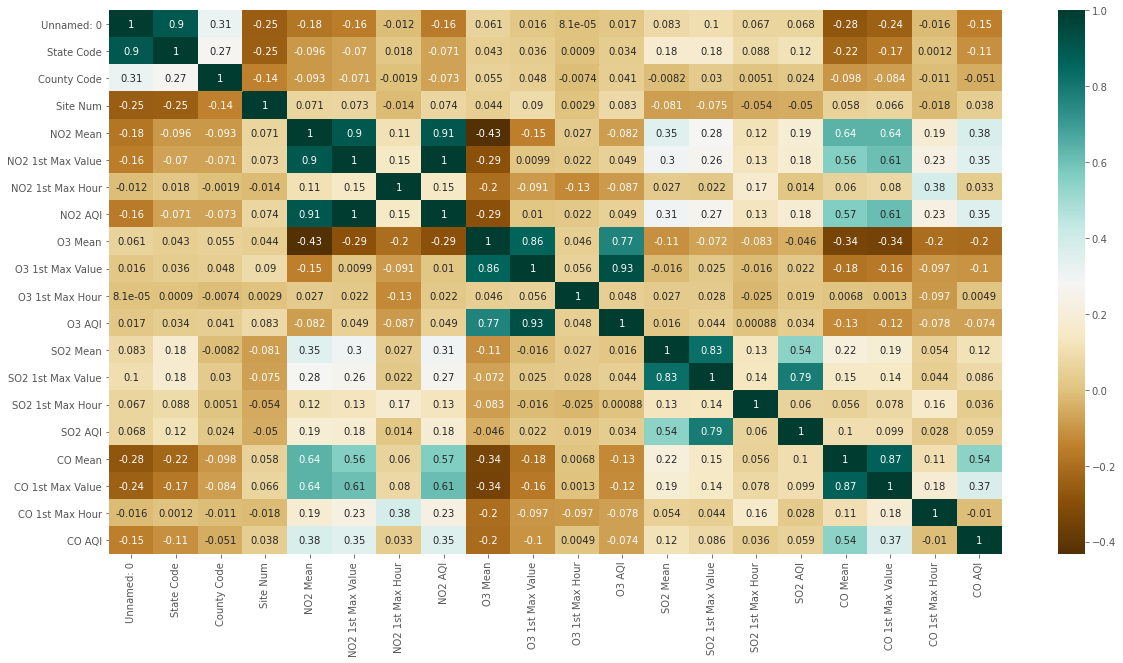

In [16]:
# Finding the relations between the variables.
plt.figure(figsize=(20,10))
c= df.corr()
sns.heatmap(c,cmap='BrBG',annot=True)
c

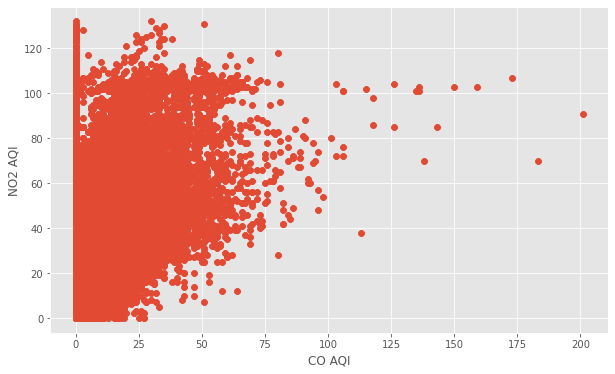

In [17]:
# Plotting a scatter plot
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['CO AQI'], df['NO2 AQI'])
ax.set_xlabel('CO AQI')
ax.set_ylabel('NO2 AQI')
plt.show()

<AxesSubplot:xlabel='CO AQI', ylabel='Density'>

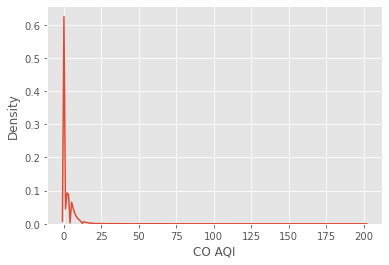

In [18]:
sns.kdeplot(df['CO AQI'])

<AxesSubplot:xlabel='NO2 AQI', ylabel='Density'>

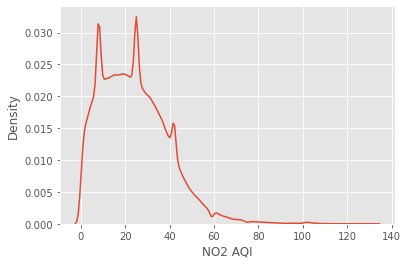

In [19]:
sns.kdeplot(df['NO2 AQI'])

In [20]:
df.columns

Index(['Unnamed: 0', 'State Code', 'County Code', 'Site Num', 'Address',
       'State', 'County', 'City', 'Date Local', 'NO2 Units', 'NO2 Mean',
       'NO2 1st Max Value', 'NO2 1st Max Hour', 'NO2 AQI', 'O3 Units',
       'O3 Mean', 'O3 1st Max Value', 'O3 1st Max Hour', 'O3 AQI', 'SO2 Units',
       'SO2 Mean', 'SO2 1st Max Value', 'SO2 1st Max Hour', 'SO2 AQI',
       'CO Units', 'CO Mean', 'CO 1st Max Value', 'CO 1st Max Hour', 'CO AQI'],
      dtype='object')

In [21]:
#plt.figure(figsize=(20,10))
#sns.boxplot(data=df)

In [22]:
df["CO AQI"].value_counts()

0.0      907467
3.0      145929
2.0      142532
5.0      114803
6.0       87432
          ...  
85.0          2
138.0         2
95.0          2
183.0         2
90.0          2
Name: CO AQI, Length: 107, dtype: int64

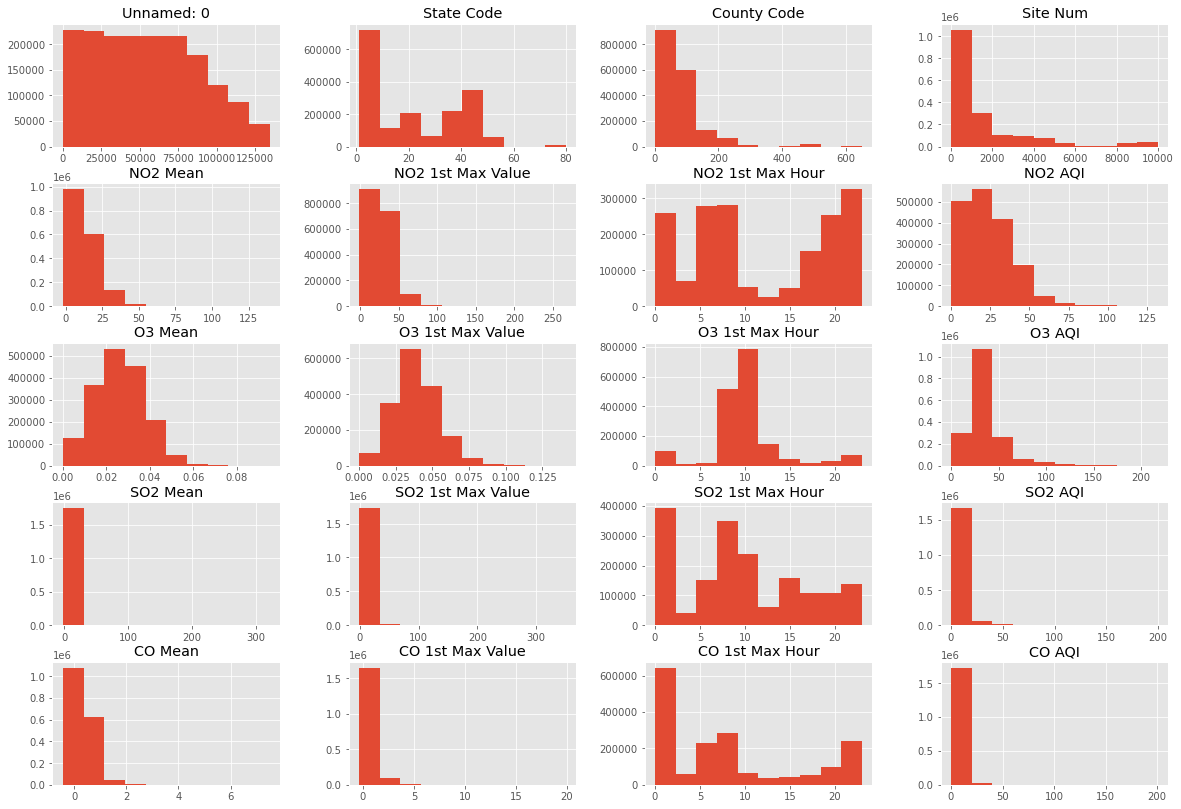

In [23]:
df.hist(figsize=(20,14))
plt.show()

In [24]:
df.columns[df.isnull().sum() > 0 ]

Index([], dtype='object')

In [25]:
for i in df.columns[df.isnull().sum() > 0 ]:
    print (i,len(df[df[i].isnull()==True])/float(len(df)))

In [26]:
df[df['CO AQI'].isnull()==True]

,Unnamed: 0,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,...,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI


In [27]:
# Create X,y
X = df.drop("CO AQI", axis="columns")
y = df["CO AQI"]

In [28]:
# Build our feature list for cat. and numeric
num_list = X.select_dtypes(include=np.number).columns
cat_list = X.select_dtypes(exclude=np.number).columns
print(num_list, cat_list)

Index(['Unnamed: 0', 'State Code', 'County Code', 'Site Num', 'NO2 Mean',
       'NO2 1st Max Value', 'NO2 1st Max Hour', 'NO2 AQI', 'O3 Mean',
       'O3 1st Max Value', 'O3 1st Max Hour', 'O3 AQI', 'SO2 Mean',
       'SO2 1st Max Value', 'SO2 1st Max Hour', 'SO2 AQI', 'CO Mean',
       'CO 1st Max Value', 'CO 1st Max Hour'],
      dtype='object') Index(['Address', 'State', 'County', 'City', 'Date Local', 'NO2 Units',
       'O3 Units', 'SO2 Units', 'CO Units'],
      dtype='object')


In [29]:
# Dummy creation
X = pd.get_dummies(X, drop_first=True)
X.head()

,Unnamed: 0,State Code,County Code,Site Num,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,...,Date Local_2016-05-22,Date Local_2016-05-23,Date Local_2016-05-24,Date Local_2016-05-25,Date Local_2016-05-26,Date Local_2016-05-27,Date Local_2016-05-28,Date Local_2016-05-29,Date Local_2016-05-30,Date Local_2016-05-31
0,0,4,13,3002,19.041667,49.0,19,46,0.022500,0.040,...,0,0,0,0,0,0,0,0,0,0
1,1,4,13,3002,19.041667,49.0,19,46,0.022500,0.040,...,0,0,0,0,0,0,0,0,0,0
2,2,4,13,3002,19.041667,49.0,19,46,0.022500,0.040,...,0,0,0,0,0,0,0,0,0,0
3,3,4,13,3002,19.041667,49.0,19,46,0.022500,0.040,...,0,0,0,0,0,0,0,0,0,0
4,4,4,13,3002,22.958333,36.0,19,34,0.013375,0.032,...,0,0,0,0,0,0,0,0,0,0


In [30]:
X.isna().sum()[(X.isna().sum() > 0)].index.tolist()

[]

In [31]:
#mask = np.zeros(df.shape,dtype='uint8')

In [32]:
df.apply(pd.to_numeric, errors='ignore')

,Unnamed: 0,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,...,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,0,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,1.145833,4.200,21,0.0
1,1,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,0.878947,2.200,23,25.0
2,2,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,2.975000,6.6,23,0.0,Parts per million,1.145833,4.200,21,0.0
3,3,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,2.975000,6.6,23,0.0,Parts per million,0.878947,2.200,23,25.0
4,4,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,Parts per billion,...,Parts per billion,1.958333,3.0,22,4.0,Parts per million,0.850000,1.600,23,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1746656,24599,56,21,100,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Not in a city,2016-03-30,Parts per billion,...,Parts per billion,0.000000,0.0,2,0.0,Parts per million,0.091667,0.100,2,1.0
1746657,24600,56,21,100,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Not in a city,2016-03-31,Parts per billion,...,Parts per billion,-0.022727,0.0,0,0.0,Parts per million,0.067714,0.127,0,0.0
1746658,24601,56,21,100,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Not in a city,2016-03-31,Parts per billion,...,Parts per billion,-0.022727,0.0,0,0.0,Parts per million,0.100000,0.100,0,1.0
1746659,24602,56,21,100,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Not in a city,2016-03-31,Parts per billion,...,Parts per billion,0.000000,0.0,5,0.0,Parts per million,0.067714,0.127,0,0.0


In [ ]:
# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Get train-test split

In [ ]:
X = df.drop(columns='CO AQI')
y = pd.DataFrame(df['CO AQI']) #target class

print('X shape :', {X.shape})
print('y shape :', {y.shape})

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
y.value_counts()

In [ ]:
# Split Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.shape, X_test.shape

In [ ]:
y.value_counts()

### Scale Data

In [ ]:
from sklearn.preprocessing import StandardScaler
import re

In [ ]:
# Instantiate Standard Scaler
scaler = StandardScaler()
# Fit & transform data.
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


### Baseline Model

In [ ]:
# The baseline predictions are the historical averages
baseline_preds = df[:, df.index('CO AQI')]
# Baseline errors, and display average baseline error
baseline_errors = abs(baseline_preds - test_labels)
print('Average baseline error: ', round(np.mean(baseline_errors), 2))

In [ ]:
# Create a baseline model
pred = [df["CO AQI"].mean() for x in range(len(df))]
Baseline = mean_absolute_error(df["CO AQI"], pred)
print(f"The baseline's MAE is: {Baseline}")

In [ ]:
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

In [ ]:
# 1. Linear Regression 

lin_reg=LinearRegression() # Initialize the model
lin_reg.fit(X_train,y_train) # Fit the model

preds_lin = lin_reg.predict(X_test) # Predict X_test

In [ ]:
# Gitting Score
print ('Score of Linear Regression')
print('---------------------------')
print('R2 : ',r2_score(y_true=y_test, y_pred=preds_lin))
print('MAE: ', mean_absolute_error(y_true=y_test, y_pred=preds_lin))
print('MSE: ',mean_squared_error(y_true=y_test, y_pred=preds_lin))
print('---------------------------')

## Thank you